In [529]:
import numpy as np       # linear algebra
import pandas as pd    #data processing
from matplotlib import pyplot as plt   # data visualization
import seaborn as sb
import re

In [530]:
data=pd.read_csv("500 richest people 2021.csv",delimiter=';') #import data
data

,Rank,Name,Total Net Worth,$ Last Change,$ YTD Change,Country,Industry,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1.0,Jeff Bezos,$188B,+$1.68B,-$2.31B,United States,Technology,NaN,NaN,NaN,NaN
1,2.0,Elon Musk,$170B,-$2.89B,+$773M,United States,Technology,NaN,NaN,NaN,NaN
2,3.0,Bernard Arnault,$155B,+$892M,+$40.9B,France,Consumer,NaN,NaN,NaN,NaN
3,4.0,Bill Gates,$144B,-$1.32B,+$12.2B,United States,Technology,NaN,NaN,NaN,NaN
4,5.0,Mark Zuckerberg,$114B,+$203M,+$10.9B,United States,Technology,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
498,500.0,Odd Reitan,$5.72B,-$19.9M,+$669M,Norway,Food & Beverage,NaN,NaN,NaN,NaN
499,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [531]:
print(data.info())          #gives information about dataset
print(data.describe())      #gives statistical analysis of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             499 non-null    float64
 1   Name             499 non-null    object 
 2   Total Net Worth  499 non-null    object 
 3   $ Last Change    499 non-null    object 
 4   $ YTD Change     499 non-null    object 
 5   Country          499 non-null    object 
 6   Industry         499 non-null    object 
 7   Unnamed: 7       0 non-null      float64
 8   Unnamed: 8       0 non-null      float64
 9   Unnamed: 9       0 non-null      float64
 10  Unnamed: 10      0 non-null      float64
dtypes: float64(5), object(6)
memory usage: 43.4+ KB
None
             Rank  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10
count  499.000000         0.0         0.0         0.0          0.0
mean   250.192385         NaN         NaN         NaN          NaN
std    144.462829         NaN         

In [532]:
print(data.head()) #displays first five rows
print(data.tail())  #displays last five rows

   Rank             Name Total Net Worth $ Last Change $ YTD Change  \
0   1.0       Jeff Bezos           $188B       +$1.68B     -$2.31B    
1   2.0        Elon Musk           $170B       -$2.89B      +$773M    
2   3.0  Bernard Arnault           $155B        +$892M     +$40.9B    
3   4.0       Bill Gates           $144B       -$1.32B     +$12.2B    
4   5.0  Mark Zuckerberg           $114B        +$203M     +$10.9B    

         Country    Industry  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  
0  United States  Technology         NaN         NaN         NaN          NaN  
1  United States  Technology         NaN         NaN         NaN          NaN  
2         France    Consumer         NaN         NaN         NaN          NaN  
3  United States  Technology         NaN         NaN         NaN          NaN  
4  United States  Technology         NaN         NaN         NaN          NaN  
      Rank        Name Total Net Worth $ Last Change $ YTD Change Country  \
498  500.0  Odd 

In [533]:
data.drop(['Unnamed: 7','Unnamed: 8','Unnamed: 9','Unnamed: 10'],axis='columns',inplace=True)  #remove columns
#inplace: If it is True, then it replaces in place.

In [534]:
data


,Rank,Name,Total Net Worth,$ Last Change,$ YTD Change,Country,Industry
0,1.0,Jeff Bezos,$188B,+$1.68B,-$2.31B,United States,Technology
1,2.0,Elon Musk,$170B,-$2.89B,+$773M,United States,Technology
2,3.0,Bernard Arnault,$155B,+$892M,+$40.9B,France,Consumer
3,4.0,Bill Gates,$144B,-$1.32B,+$12.2B,United States,Technology
4,5.0,Mark Zuckerberg,$114B,+$203M,+$10.9B,United States,Technology
...,...,...,...,...,...,...,...
498,500.0,Odd Reitan,$5.72B,-$19.9M,+$669M,Norway,Food & Beverage
499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [535]:
data.isnull().sum()      #checks the null values

Rank               4
Name               4
Total Net Worth    4
$ Last Change      4
$ YTD Change       4
Country            4
Industry           4
dtype: int64

In [536]:
data.dropna(axis=0,inplace=True) #axis=0 removes null value rows

In [537]:
data

,Rank,Name,Total Net Worth,$ Last Change,$ YTD Change,Country,Industry
0,1.0,Jeff Bezos,$188B,+$1.68B,-$2.31B,United States,Technology
1,2.0,Elon Musk,$170B,-$2.89B,+$773M,United States,Technology
2,3.0,Bernard Arnault,$155B,+$892M,+$40.9B,France,Consumer
3,4.0,Bill Gates,$144B,-$1.32B,+$12.2B,United States,Technology
4,5.0,Mark Zuckerberg,$114B,+$203M,+$10.9B,United States,Technology
...,...,...,...,...,...,...,...
494,496.0,Lino Saputo,$5.75B,-$48.0M,+$772M,Canada,Food & Beverage
495,497.0,Prajogo Pangestu,$5.74B,-$74.7M,-$1.03B,Indonesia,Energy
496,498.0,Charles Dolan & Family,$5.74B,-$35.8M,+$212M,United States,Media & Telecom
497,499.0,Vladimir Kim,$5.72B,+$2.80M,+$792M,Kazakhstan,Commodities


In [538]:
data.isnull().sum()


Rank               0
Name               0
Total Net Worth    0
$ Last Change      0
$ YTD Change       0
Country            0
Industry           0
dtype: int64

In [539]:
pd.Categorical(data['Country'])


['United States', 'United States', 'France', 'United States', 'United States', ..., 'Canada', 'Indonesia', 'United States', 'Kazakhstan', 'Norway']
Length: 499
Categories (50, object): ['Argentina', 'Australia', 'Austria', 'Brazil', ..., 'United Arab Emirates', 'United Kingdom', 'United States', 'Viet Nam']

In [540]:
f1=pd.get_dummies(data['Country'])
f2=pd.get_dummies(data['Industry'])
print(f1)
print(f2)

     Argentina  Australia  Austria  Brazil  Canada  Canda  Cayman Islands  \
0            0          0        0       0       0      0               0   
1            0          0        0       0       0      0               0   
2            0          0        0       0       0      0               0   
3            0          0        0       0       0      0               0   
4            0          0        0       0       0      0               0   
..         ...        ...      ...     ...     ...    ...             ...   
494          0          0        0       0       1      0               0   
495          0          0        0       0       0      0               0   
496          0          0        0       0       0      0               0   
497          0          0        0       0       0      0               0   
498          0          0        0       0       0      0               0   

     Chile  China  Colombia  ...  Spain   Sweden  Switzerland  Taiwan  \
0 

In [541]:
data.replace('Canda','Canada',inplace= True) #replace spelling mistake
pd.Categorical(data['Country']) #checking weather canda replaced to canada or not

['United States', 'United States', 'France', 'United States', 'United States', ..., 'Canada', 'Indonesia', 'United States', 'Kazakhstan', 'Norway']
Length: 499
Categories (49, object): ['Argentina', 'Australia', 'Austria', 'Brazil', ..., 'United Arab Emirates', 'United Kingdom', 'United States', 'Viet Nam']

In [542]:
pd.get_dummies(data['Country'])

,Argentina,Australia,Austria,Brazil,Canada,Cayman Islands,Chile,China,Colombia,Cyprus,...,Spain,Sweden,Switzerland,Taiwan,Thailand,Ukraine,United Arab Emirates,United Kingdom,United States,Viet Nam
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [543]:
data

,Rank,Name,Total Net Worth,$ Last Change,$ YTD Change,Country,Industry
0,1.0,Jeff Bezos,$188B,+$1.68B,-$2.31B,United States,Technology
1,2.0,Elon Musk,$170B,-$2.89B,+$773M,United States,Technology
2,3.0,Bernard Arnault,$155B,+$892M,+$40.9B,France,Consumer
3,4.0,Bill Gates,$144B,-$1.32B,+$12.2B,United States,Technology
4,5.0,Mark Zuckerberg,$114B,+$203M,+$10.9B,United States,Technology
...,...,...,...,...,...,...,...
494,496.0,Lino Saputo,$5.75B,-$48.0M,+$772M,Canada,Food & Beverage
495,497.0,Prajogo Pangestu,$5.74B,-$74.7M,-$1.03B,Indonesia,Energy
496,498.0,Charles Dolan & Family,$5.74B,-$35.8M,+$212M,United States,Media & Telecom
497,499.0,Vladimir Kim,$5.72B,+$2.80M,+$792M,Kazakhstan,Commodities


In [544]:
data=data.replace(['\$'," "],"",regex=True)  #to replace symbols
data

,Rank,Name,Total Net Worth,$ Last Change,$ YTD Change,Country,Industry
0,1.0,JeffBezos,188B,+1.68B,-2.31B,UnitedStates,Technology
1,2.0,ElonMusk,170B,-2.89B,+773M,UnitedStates,Technology
2,3.0,BernardArnault,155B,+892M,+40.9B,France,Consumer
3,4.0,BillGates,144B,-1.32B,+12.2B,UnitedStates,Technology
4,5.0,MarkZuckerberg,114B,+203M,+10.9B,UnitedStates,Technology
...,...,...,...,...,...,...,...
494,496.0,LinoSaputo,5.75B,-48.0M,+772M,Canada,Food&Beverage
495,497.0,PrajogoPangestu,5.74B,-74.7M,-1.03B,Indonesia,Energy
496,498.0,CharlesDolan&Family,5.74B,-35.8M,+212M,UnitedStates,Media&Telecom
497,499.0,VladimirKim,5.72B,+2.80M,+792M,Kazakhstan,Commodities


In [545]:
data['Total Net Worth']=data['Total Net Worth'].replace('B',"",regex=True)   #to remove B in total net worth column

In [546]:
data

,Rank,Name,Total Net Worth,$ Last Change,$ YTD Change,Country,Industry
0,1.0,JeffBezos,188,+1.68B,-2.31B,UnitedStates,Technology
1,2.0,ElonMusk,170,-2.89B,+773M,UnitedStates,Technology
2,3.0,BernardArnault,155,+892M,+40.9B,France,Consumer
3,4.0,BillGates,144,-1.32B,+12.2B,UnitedStates,Technology
4,5.0,MarkZuckerberg,114,+203M,+10.9B,UnitedStates,Technology
...,...,...,...,...,...,...,...
494,496.0,LinoSaputo,5.75,-48.0M,+772M,Canada,Food&Beverage
495,497.0,PrajogoPangestu,5.74,-74.7M,-1.03B,Indonesia,Energy
496,498.0,CharlesDolan&Family,5.74,-35.8M,+212M,UnitedStates,Media&Telecom
497,499.0,VladimirKim,5.72,+2.80M,+792M,Kazakhstan,Commodities


In [547]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             499 non-null    float64
 1   Name             499 non-null    object 
 2   Total Net Worth  499 non-null    object 
 3   $ Last Change    499 non-null    object 
 4   $ YTD Change     499 non-null    object 
 5   Country          499 non-null    object 
 6   Industry         499 non-null    object 
dtypes: float64(1), object(6)
memory usage: 31.2+ KB


In [548]:
data['Total Net Worth']=pd.to_numeric(data['Total Net Worth'],errors="coerce")   #convert string data type to numeric
data['Total Net Worth'].dtype

dtype('float64')

In [549]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             499 non-null    float64
 1   Name             499 non-null    object 
 2   Total Net Worth  498 non-null    float64
 3   $ Last Change    499 non-null    object 
 4   $ YTD Change     499 non-null    object 
 5   Country          499 non-null    object 
 6   Industry         499 non-null    object 
dtypes: float64(2), object(5)
memory usage: 31.2+ KB


In [550]:
data

,Rank,Name,Total Net Worth,$ Last Change,$ YTD Change,Country,Industry
0,1.0,JeffBezos,188.00,+1.68B,-2.31B,UnitedStates,Technology
1,2.0,ElonMusk,170.00,-2.89B,+773M,UnitedStates,Technology
2,3.0,BernardArnault,155.00,+892M,+40.9B,France,Consumer
3,4.0,BillGates,144.00,-1.32B,+12.2B,UnitedStates,Technology
4,5.0,MarkZuckerberg,114.00,+203M,+10.9B,UnitedStates,Technology
...,...,...,...,...,...,...,...
494,496.0,LinoSaputo,5.75,-48.0M,+772M,Canada,Food&Beverage
495,497.0,PrajogoPangestu,5.74,-74.7M,-1.03B,Indonesia,Energy
496,498.0,CharlesDolan&Family,5.74,-35.8M,+212M,UnitedStates,Media&Telecom
497,499.0,VladimirKim,5.72,+2.80M,+792M,Kazakhstan,Commodities


In [551]:
def value_to_float(x):
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K','')) * 0.000001
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M','')) * 1000
    if 'B' in x:
        if len(x) > 1:
            return float(x.replace('B','')) * 100000
data['$ Last Change'] = data['$ Last Change'].apply(value_to_float)
data['$ YTD Change']=data['$ YTD Change'].apply(value_to_float)
data
     #convert string to flaot by mutiplying with appropriate vale

,Rank,Name,Total Net Worth,$ Last Change,$ YTD Change,Country,Industry
0,1.0,JeffBezos,188.00,168000.0,-231000.0,UnitedStates,Technology
1,2.0,ElonMusk,170.00,-289000.0,773000.0,UnitedStates,Technology
2,3.0,BernardArnault,155.00,892000.0,4090000.0,France,Consumer
3,4.0,BillGates,144.00,-132000.0,1220000.0,UnitedStates,Technology
4,5.0,MarkZuckerberg,114.00,203000.0,1090000.0,UnitedStates,Technology
...,...,...,...,...,...,...,...
494,496.0,LinoSaputo,5.75,-48000.0,772000.0,Canada,Food&Beverage
495,497.0,PrajogoPangestu,5.74,-74700.0,-103000.0,Indonesia,Energy
496,498.0,CharlesDolan&Family,5.74,-35800.0,212000.0,UnitedStates,Media&Telecom
497,499.0,VladimirKim,5.72,2800.0,792000.0,Kazakhstan,Commodities


In [553]:
data.dtypes

Rank               float64
Name                object
Total Net Worth    float64
$ Last Change      float64
$ YTD Change       float64
Country             object
Industry            object
dtype: object

In [555]:
display(data[data['Total Net Worth']>50])   #filtering data 

,Rank,Name,Total Net Worth,$ Last Change,$ YTD Change,Country,Industry
0,1.0,JeffBezos,188.0,168000.0,-231000.0,UnitedStates,Technology
1,2.0,ElonMusk,170.0,-289000.0,773000.0,UnitedStates,Technology
2,3.0,BernardArnault,155.0,892000.0,4090000.0,France,Consumer
3,4.0,BillGates,144.0,-132000.0,1220000.0,UnitedStates,Technology
4,5.0,MarkZuckerberg,114.0,203000.0,1090000.0,UnitedStates,Technology
5,6.0,WarrenBuffett,108.0,-232000.0,2060000.0,UnitedStates,Diversified
6,7.0,LarryPage,104.0,-112000.0,2160000.0,UnitedStates,Technology
7,8.0,SergeyBrin,101.0,-106000.0,2080000.0,UnitedStates,Technology
8,9.0,LarryEllison,90.6,-246000.0,1090000.0,UnitedStates,Technology
9,10.0,SteveBallmer,89.1,-342000.0,871000.0,UnitedStates,Technology


In [556]:
from matplotlib import style
from matplotlib import figure
style.use('fivethirtyeight')

In [557]:
india=data[data.Country=='India']

In [559]:
india

,Rank,Name,Total Net Worth,$ Last Change,$ YTD Change,Country,Industry
12,13.0,MukeshAmbani,74.10,402000.0,-261000.0,India,Energy
16,17.0,GautamAdani,62.80,210000.0,2900000.0,India,Industrial
44,45.0,AzimPremji,31.40,-347000.0,601000.0,India,Technology
74,75.0,ShivNadar,23.20,-102000.0,-904000.0,India,Technology
86,87.0,LakshmiMittal,20.90,-252000.0,448000.0,India,Retail
121,122.0,CyrusPoonawalla,16.20,-45000.0,-25500.0,India,HealthCare
132,133.0,RadhakishanDamani,15.40,8990.0,481000.0,India,Retail
139,140.0,UdayKotak,14.60,-359000.0,-175000.0,India,Finance
182,183.0,DilipShanghvi,12.10,207000.0,189000.0,India,HealthCare
184,185.0,SavitriJindal,11.90,-266000.0,459000.0,India,Commodities


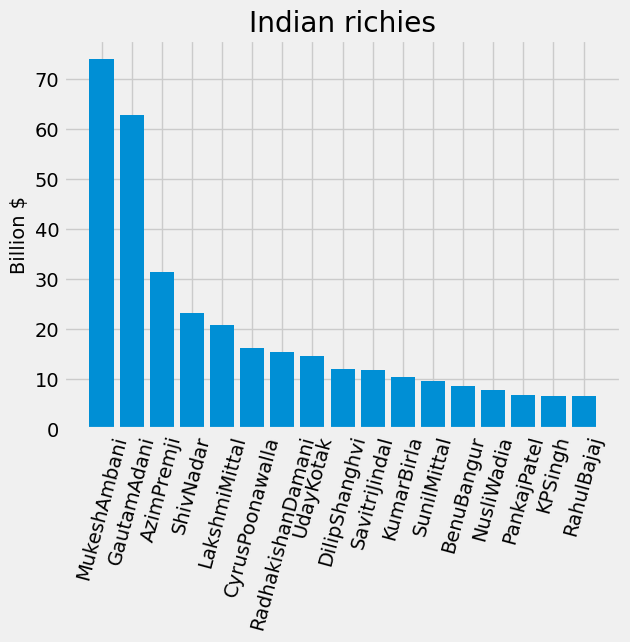

In [561]:
plt.bar(india['Name'],india['Total Net Worth'])
plt.title('Indian richies')
plt.ylabel('Billion $')
plt.xticks(rotation=75)

plt.show()

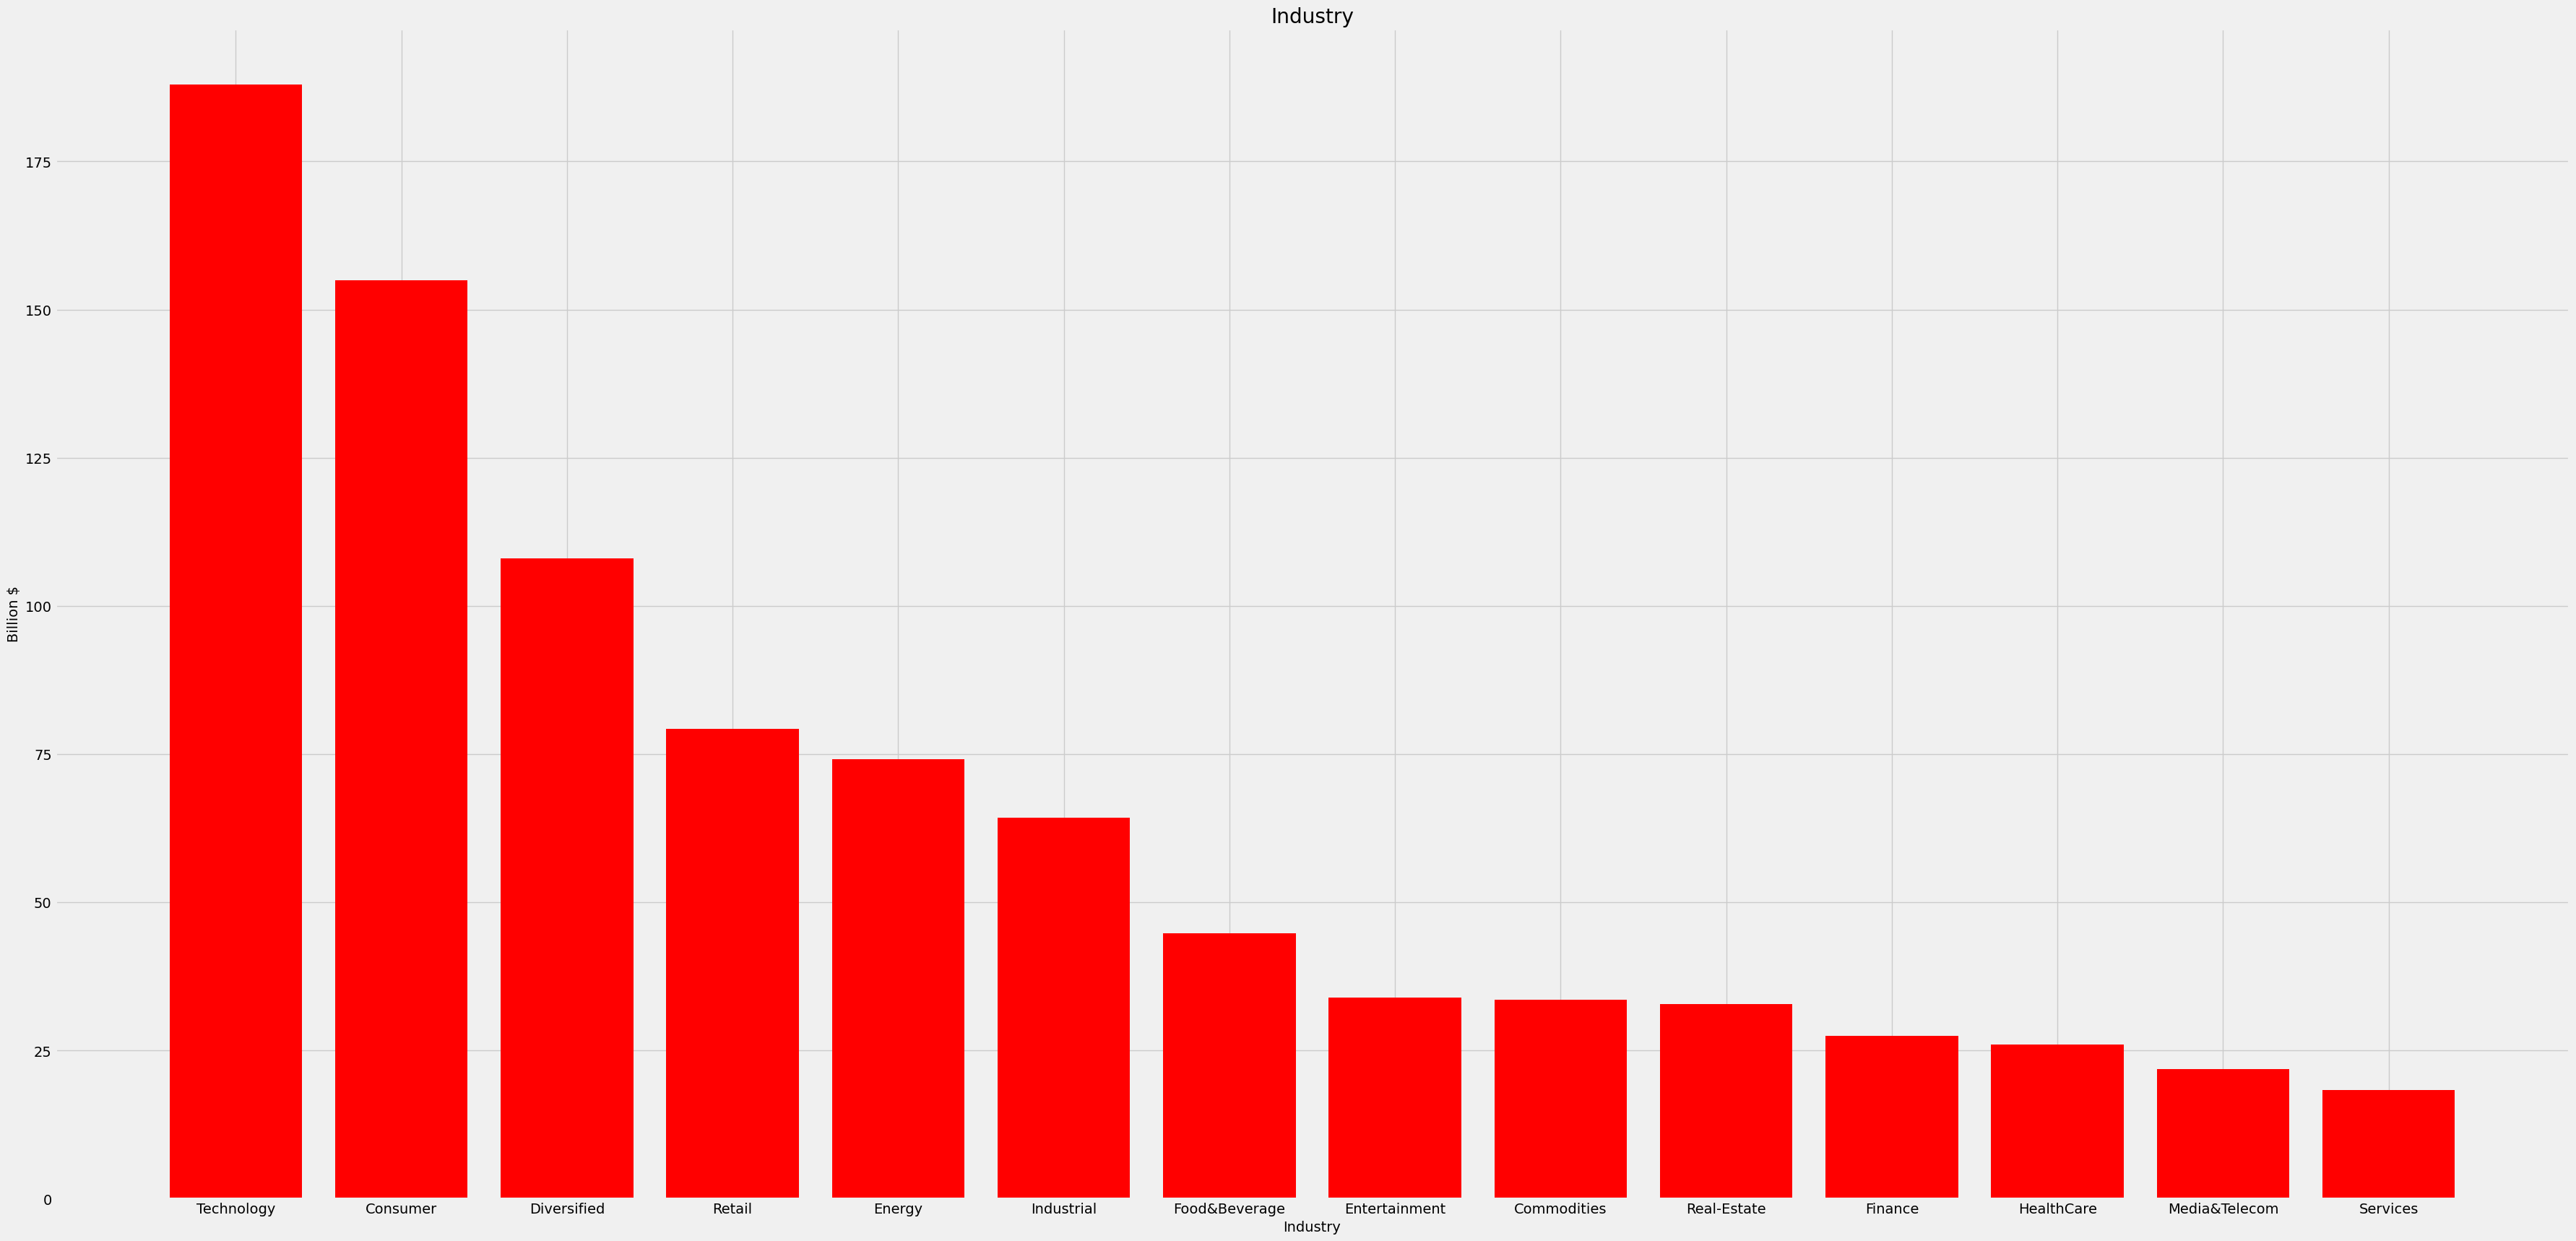

In [567]:
#Off alll countries
plt.bar(data['Industry'],data['Total Net Worth'],color='red')
plt.title('Industry')
plt.xlabel('Industry')
plt.ylabel('Billion $')
plt.gcf().set_size_inches(40,20)
plt.show()

In [570]:
display(data['Country'].value_counts())

UnitedStates          157
China                  77
Germany                31
Russia                 25
HongKong               18
India                  17
UnitedKingdom          17
France                 16
Canada                 14
Sweden                 11
Singapore              10
Australia               8
Switzerland             8
Japan                   7
Italy                   7
Korea                   7
Mexico                  6
Denmark                 6
Brazil                  5
Taiwan                  4
Indonesia               4
Ireland                 4
Israel                  3
SouthAfrica             3
SaudiArabia             3
Norway                  3
Netherlands             2
Spain                   2
Colombia                2
Malaysia                2
Thailand                2
Austria                 2
Argentina               1
Finland                 1
Philippines             1
CaymanIslands           1
Georgia                 1
Egypt                   1
UnitedArabEm

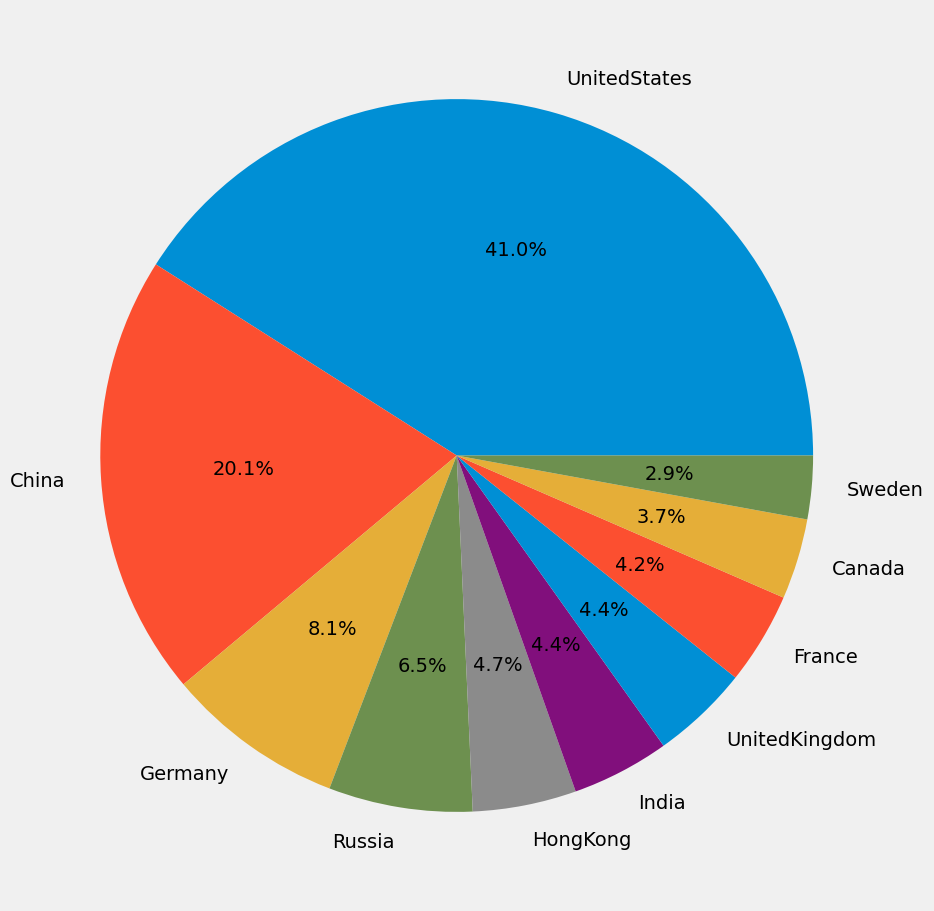

In [583]:
# percentage of richies 
country=data['Country'].value_counts().head(10).values
name=data['Country'].value_counts().head(10).index
plt.pie(country,labels=name,autopct='%1.1f%%')
plt.gcf().set_size_inches(20,11)
plt.show()

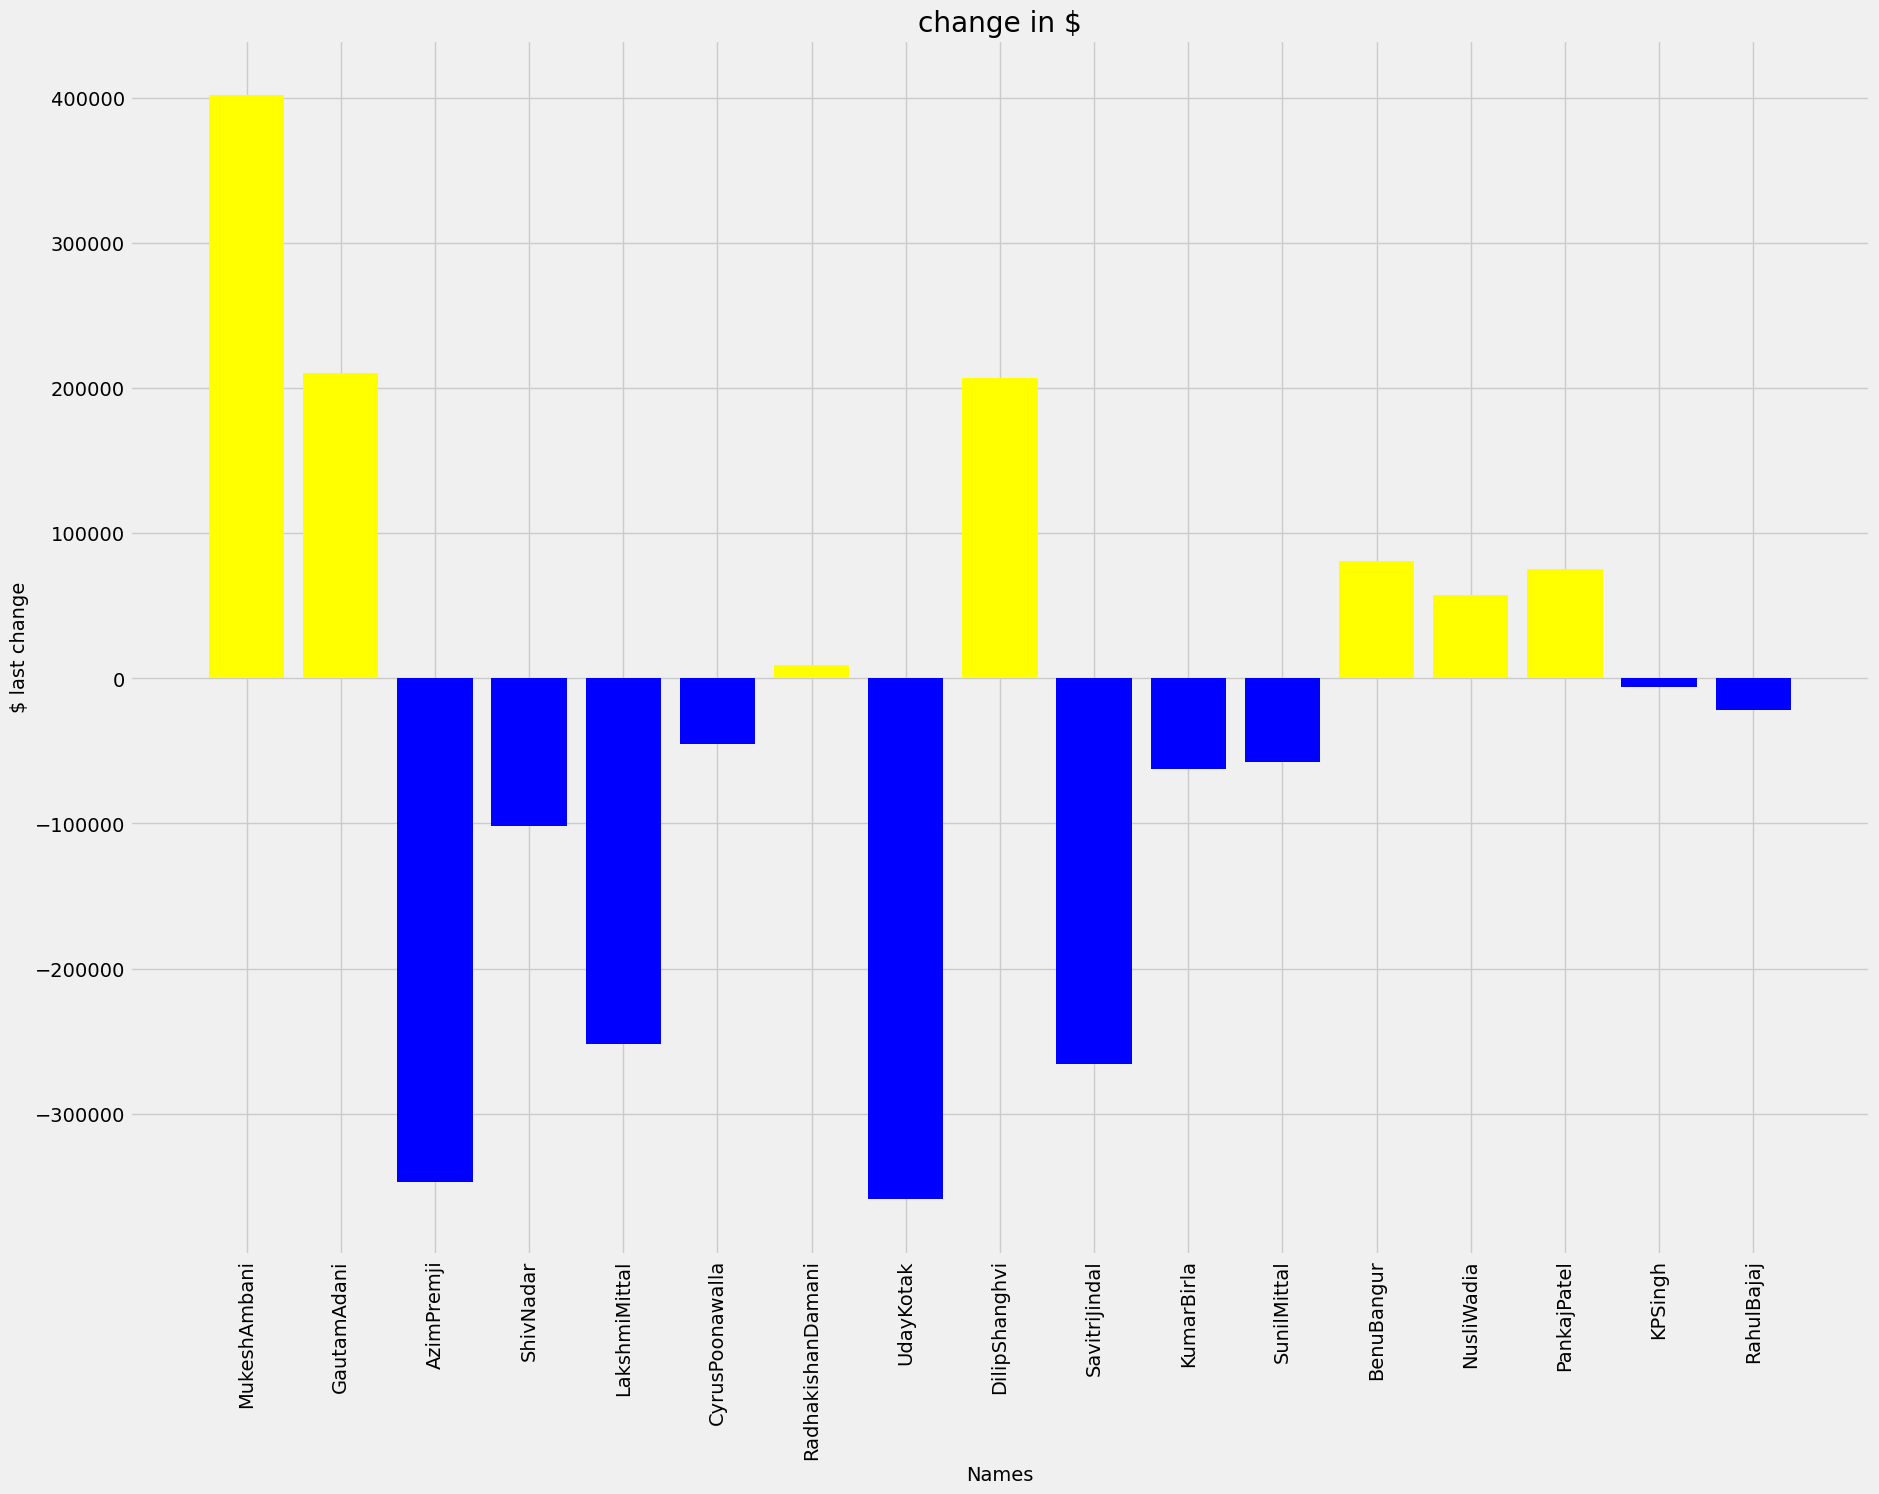

In [590]:
plt.bar(india['Name'],india['$ Last Change'],color=(india['$ Last Change']>0.0).map({True:'yellow',False:'blue'}))
plt.title('change in $')
plt.ylabel('$ last change')
plt.xlabel('Names')
plt.xticks(rotation=90)
plt.gcf().set_size_inches(20,15)
plt.show()